# 마켓과 머신러닝

* 가장 간단한 머신러닝 알고리즘 중 하나인 k-최근접 이웃 알고리즘을 사용하여 2개의 물고기 종류를 분류하는 머신러닝 모델을 훈련

### 생선 분류 문제

* 판매할 생선의 정보(길이, 무게)를 이용하여 생선의 종류 분류
    - 관심을 가지는 고기:도미(Bream), 방어(Smelt)
* 생선 데이터셋의 출처 : 구글에서 fish market으로 검색하여 사이트에서 다운로드 가능

*** 도미 데엍 준비하기

- 손코딩 하지 마시고 아래의 사이트에서 가지고 옵시다
>.[도미 데이터]http://bit.ly/bream_list

In [ ]:
# 총 35마리 도미에 대한 길이, 무게 정보를 저장하고 있는 리스트

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
                
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

### 도미의 길이, 무게 간의 상관관계 파악
* 산점도 그래프를 그려서 두 변수간의 관계를 파악

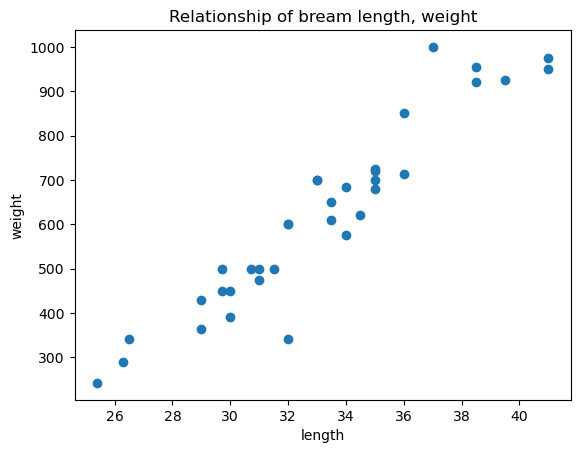

In [23]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.title('Relationship of bream length, weight')
plt.show()

### 빙어 데이터 준비하기

- 손코딩 하지 마시고 아래의 사이트에서 가지고 옵시다
>.[빙어 데이터]http://bit.ly/smelt_list

In [32]:
# 총 14마리 방어에 대한 길이, 무게 정보를 공유하고 저장

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

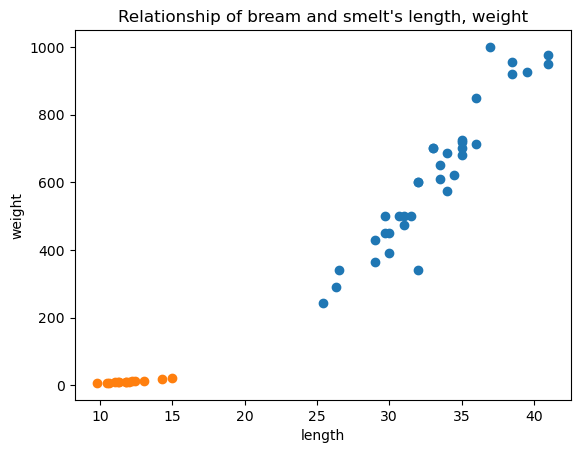

In [36]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.title('Relationship of bream and smelt\'s length, weight')
plt.show()

### 첫번쨰 머신러닝 프로그램
* 알고리즘 : k-최근접 이웃(k-Nearest Neighbors) 알고리즘


In [49]:
# 도미 데이터와 빙어 데이터를 하나의 데이터로 병합
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

* 사이킷런 라이브러리에서 사용하는 입력 데이터는 2차원 리스트 형태
    - 각 특성의 리스틀르 세로 방향으로 늘어뜨린 2차원 리스트 생성해야 함


In [68]:
fish_data = [[l, w] for l, w in zip(length, weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

- 알고리즘에 입력할 정답 데이터를 생선(생선의 종류)

In [73]:
fish_target = [1] * 35 + [0] *14
print(fish_target)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [83]:
# k-최근접 이웃 알고리즘을 사용하기 위한 라이브러리 로드
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier() # k-최근접 이웃 분류 객체 생성

# 주어진 생선 데이터를 이용하여 알고리즘을 훈련
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [85]:
kn.score(fish_data, fish_target)

1.0

* 새로운 생선 데이터를 입력했을 때 어떤 생선으로 예측하는지 확인

In [90]:
# 길이 30, 무게 600인 생선이 어떤 종류인지 예측
kn.predict([[30, 600]]) # 특성을 입력할 때에는 항상 2차원 배열로 만들어서 입력해야 함

array([1])

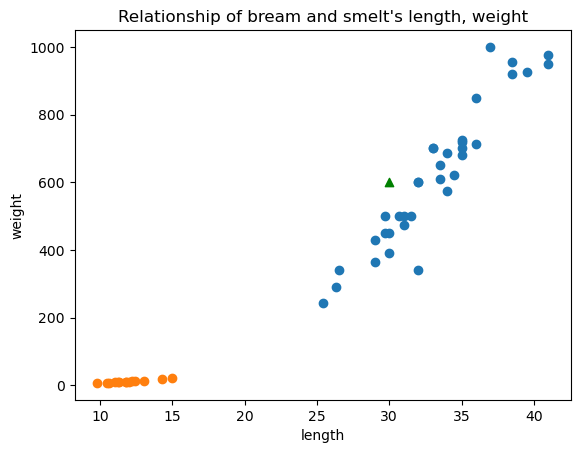

In [92]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, color='green', marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('Relationship of bream and smelt\'s length, weight')
plt.show()

#### 문제) 메모리 부담
* 훈련시킬 때 입력했던 모든 특성, 타겟 데이터를 모델에 다 저장하고 예측할 때 사용하기 때문에 데이터가 많아질 수록 메모리 부담

In [104]:
# k-최근접 알고리즘 객체가 들고 있는 특성 데이터 출력
kn._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [102]:
# k-최근접 알고리
kn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

#### 문제) 예측 오류 발생
- 찾아보는 최근접 이웃의 개수에 따라 예측 오류 발생 여지 있음

In [120]:
# 참고하는 데이터를 기본 5개가 아닌 입력된 49개 모든 데이터를 참고하는 모델 생성
kn49 = KNeighborsClassifier(n_neighbors = 49)

In [124]:
# 49개의 모든 생선 데이터를 이용핟여 생선 종류를 판별하기 때문에
# 다수를 차지하는 도미 데이터로 판별할 수 밖에 없음
# ==> 입력되는 모든 데이터가 도미 데이터가 됨(49개 중 36개의 도미만 정답)
# ==> 정답률 : 71.4%
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143